# Google Stock Price Prediction

## Preparing data 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

In [24]:
df = pd.read_csv('GOOG.csv', date_parser = True) #Get stock data in csv format

In [25]:
df.shape

(4104, 7)

In [26]:
# We will use all the data till 1st Jan 2020 as training data the rest will be the test data
train_set = df[df['Date'] < '2020-01-01'].copy() 
train_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3864,2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
3865,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
3866,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
3867,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900


In [27]:
test_set = df[df['Date'] >= '2020-01-01'].copy() # create testing dataset from data of 1st January 2020 onwards
test_set

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
...,...,...,...,...,...,...,...
4099,2020-11-30,1781.183960,1788.064941,1755.000000,1760.739990,1760.739990,1823800
4100,2020-12-01,1774.369995,1824.829956,1769.369995,1798.099976,1798.099976,1739000
4101,2020-12-02,1798.099976,1835.650024,1789.473022,1827.949951,1827.949951,1222000
4102,2020-12-03,1824.010010,1847.199951,1822.650024,1826.770020,1826.770020,1227300


In [28]:
training_data = train_set.drop(['Date', 'Adj Close'], axis = 1) # Remove unecassary columns
training_data

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100
...,...,...,...,...,...
3864,1348.500000,1350.260010,1342.780029,1343.560059,347500
3865,1346.170044,1361.327026,1344.469971,1360.400024,667500
3866,1362.989990,1364.530029,1349.310059,1351.890015,1038400
3867,1350.000000,1353.000000,1334.020020,1336.140015,1050900


In [29]:
scaler = MinMaxScaler() #Scale training data for LSTM between 0 and 1 for better prediction
training_data = scaler.fit_transform(training_data)
training_data

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[3.07080191e-04, 8.79291979e-04, 0.00000000e+00, 1.25356905e-04,
        5.43577404e-01],
       [6.89986513e-04, 2.78189186e-03, 1.73314228e-03, 3.15285500e-03,
        2.77885613e-01],
       [4.38255570e-03, 4.44951014e-03, 4.99709621e-03, 3.56690484e-03,
        2.22150736e-01],
       ...,
       [9.99726026e-01, 9.99642423e-01, 9.97425041e-01, 9.92923311e-01,
        1.24858240e-02],
       [9.89839738e-01, 9.90869803e-01, 9.85707361e-01, 9.80912804e-01,
        1.26372774e-02],
       [9.74702051e-01, 9.79457057e-01, 9.81925328e-01, 9.81583871e-01,
        1.15577171e-02]])

In [30]:
X_train = []
y_train = []

In [31]:
for i in range(30, training_data.shape[0]):
    X_train.append(training_data[i-30:i]) #X_train is a list of lists each having 30 day data 
    y_train.append(training_data[i, 0]) #y_train is a set of data having values from each 30 day set for the next day after the previous 30 days

In [32]:
X_train, y_train = np.array(X_train), np.array(y_train) #Convert in np.array foo reshaping 

In [33]:
X_train.shape, y_train.shape
y_train

array([0.01198378, 0.01367085, 0.01344717, ..., 0.99972603, 0.98983974,
       0.97470205])

In [34]:
#scaler.scale_ 

In [35]:
#scale = 1/7.61069658e-04
#temp = y_train*scale
#temp

## Building LSTM Model 

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [38]:
regressor = Sequential() #Sequential model for the LSTM

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences=True, input_shape = (X_train.shape[1], 5)))  
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [39]:
regressor.summary() #Model summary giving shapes of layers and parameters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm (UnifiedLSTM)   (None, 30, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 30, 60)            0         
_________________________________________________________________
unified_lstm_1 (UnifiedLSTM) (None, 30, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 60)            0         
_________________________________________________________________
unified_lstm_2 (UnifiedLSTM) (None, 30, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 80)            0         
_________________________________________________________________
unified_lstm_3 (UnifiedLSTM) (None, 120)               9

In [40]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') #compile model

In [41]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32) #Train the model on training data

Epoch 1/50
3839/3839 [==============================] - 37s 10ms/sample - loss: 0.0121
Epoch 2/50
3839/3839 [==============================] - 26s 7ms/sample - loss: 0.0022
Epoch 3/50
3839/3839 [==============================] - 28s 7ms/sample - loss: 0.0020
Epoch 4/50
3839/3839 [==============================] - 28s 7ms/sample - loss: 0.0019
Epoch 5/50
3839/3839 [==============================] - 27s 7ms/sample - loss: 0.0016
Epoch 6/50
3839/3839 [==============================] - 28s 7ms/sample - loss: 0.0017
Epoch 7/50
3839/3839 [==============================] - 27s 7ms/sample - loss: 0.0014
Epoch 8/50
3839/3839 [==============================] - 28s 7ms/sample - loss: 0.0013
Epoch 9/50
3839/3839 [==============================] - 24s 6ms/sample - loss: 0.0013
Epoch 10/50
3839/3839 [==============================] - 25s 6ms/sample - loss: 0.0013
Epoch 11/50
3839/3839 [==============================] - 26s 7ms/sample - loss: 0.0011
Epoch 12/50
3839/3839 [============================

## Prepare Test Data

In [262]:
last_30_day_data = train_set.tail(30)
df_test = last_30_day_data.append(test_set, ignore_index=True)

In [263]:
df_test = df_test.drop(['Date', "Adj Close"], axis=1)
df_test.head()

,Open,High,Low,Close,Volume
0,1332.219971,1335.529053,1317.500000,1320.699951,1487400
1,1327.699951,1327.699951,1312.800049,1315.459961,1269200
2,1311.739990,1315.000000,1291.150024,1303.050049,1308600
3,1301.479980,1312.589966,1293.000000,1301.349976,995500
4,1305.619995,1308.729980,1291.410034,1295.339966,1385700


In [264]:
norm_test_set = scaler.transform(df_test) #Scale test data
norm_test_set

array([[0.9763079 , 0.97757704, 0.97304707, 0.96913864, 0.01792603],
       [0.97286785, 0.97162027, 0.96944522, 0.96514278, 0.01528226],
       [0.96072121, 0.96195751, 0.9528535 , 0.95567933, 0.01575964],
       ...,
       [1.33087503, 1.35809395, 1.33474847, 1.35595324, 0.01471037],
       [1.35059437, 1.36688171, 1.36017401, 1.35505345, 0.01477459],
       [1.35098253, 1.35619944, 1.35583639, 1.35598377, 0.01657749]])

In [265]:
X_test = []
y_test = []
# Arrange test data similarly as input data 
for i in range(30, norm_test_set.shape[0]): 
    X_test.append(norm_test_set[i-30:i])
    y_test.append(norm_test_set[i, 0])

In [266]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [267]:
X_test.shape

(235, 30, 5)

In [268]:
y_pred = regressor.predict(X_test) #predict values for X_test 
scaler.scale_

array([7.61069658e-04, 7.60849739e-04, 7.66360329e-04, 7.62571888e-04,
       1.21162775e-08])

In [269]:
scale = 1/7.61069658e-04
scale

1313.940175499678

In [270]:
y_test = y_test*scale #Rescale data to original forms rather than in the range 0 and 1
y_pred = y_pred*scale

y_test

array([1292.14024849, 1298.45018449, 1300.59019949, 1348.53014051,
       1342.67015551, 1371.16014552, 1378.15025852, 1386.72020453,
       1389.60020953, 1380.80016053, 1398.03014053, 1413.50023354,
       1429.71019454, 1441.59019955, 1438.23021455, 1444.18016555,
       1381.59019953, 1393.59019953, 1409.39024854, 1390.55016053,
       1419.49022354, 1412.59019954, 1407.66014554, 1413.01024354,
       1400.92015553, 1417.89024854, 1424.91014554, 1462.40025856,
       1465.07017956, 1463.28014056, 1466.19017556, 1465.59019956,
       1475.66014556, 1472.59019956, 1458.62022855, 1376.70018452,
       1383.59019953, 1346.73021451, 1312.6502585 , 1228.09019947,
       1302.2001845 , 1350.01024351, 1309.8201795 , 1300.79015049,
       1227.65025847, 1155.89024844, 1210.59019946, 1200.29015046,
       1076.59019941, 1129.59019943, 1046.5901994 , 1043.7001844 ,
       1007.10020938, 1043.6402484 , 1086.31017041, 1011.91014538,
       1054.3602194 , 1077.06017041, 1062.3902484 , 1076.26024

In [271]:
len(y_test)

235

## Vizualizing Predictions

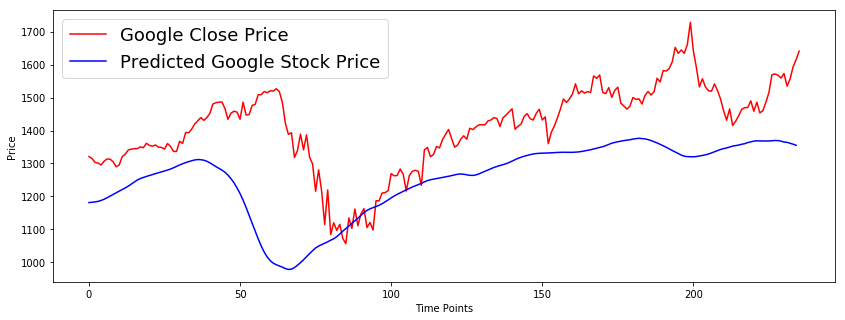

In [272]:
#Plot the predicted values and close price values
plt.figure(figsize = (14, 5))
plt.plot(df_test['Close'].loc[:235], color='r', label='Google Close Price')
plt.plot(y_pred, color='b', label='Predicted Google Stock Price')

plt.xlabel('Time Points')
plt.ylabel('Price')
plt.legend(fontsize=18)

In [273]:
np.mean(df_test['Close'].loc[:235]) #mean of close price

1410.469510355932

In [274]:
np.mean(y_pred) #mean of predicted price

1255.4004

In [281]:
math.sqrt(mean_squared_error(y_pred, df_test['Close'].loc[:234]))

191.21478820114905

## Second LSTM Model

In [288]:
#Split train test data
df_close_train = df[df['Date'] < '2020-01-01']['Close'].copy()
df_close_test = df[df['Date'] >= '2020-01-01']['Close'].copy()

In [289]:
df_close_train = df_close_train.to_frame()

In [290]:
df_close_test = df_close_test.to_frame()

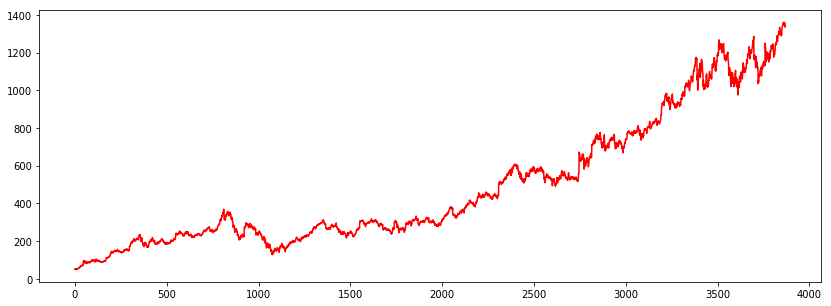

In [291]:
plt.figure(figsize = (14, 5))
plt.plot(df_close_train, color = 'r')

In [292]:
#scale data
scaler_two = MinMaxScaler()
close_train = scaler_two.fit_transform(df_close_train)

In [293]:
close_train

array([[1.25356905e-04],
       [3.15285500e-03],
       [3.56690484e-03],
       ...,
       [9.92923311e-01],
       [9.80912804e-01],
       [9.81583871e-01]])

In [294]:
#function to create dataset similarly as first model 

def create_dataset(dataset, time_step=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - time_step - 1):
        data_X.append(dataset[i:(i + time_step), 0])
        data_Y.append(dataset[i + time_step, 0])
    return np.array(data_X), np.array(data_Y)

In [295]:
close_test = scaler_two.transform(df_close_test) #transform close data 

In [296]:
# create train test datasets
timestep = 30
X_train, y_train = create_dataset(close_train, timestep)
X_test, y_test = create_dataset(close_test, timestep)

In [297]:
X_train

array([[1.25356905e-04, 3.15285500e-03, 3.56690484e-03, ...,
        1.01992999e-02, 1.18023175e-02, 1.12401220e-02],
       [3.15285500e-03, 3.56690484e-03, 1.84612935e-03, ...,
        1.18023175e-02, 1.12401220e-02, 1.23721112e-02],
       [3.56690484e-03, 1.84612935e-03, 2.27537573e-03, ...,
        1.12401220e-02, 1.23721112e-02, 1.33141666e-02],
       ...,
       [9.52438395e-01, 9.51828300e-01, 9.62092488e-01, ...,
        9.91169358e-01, 9.90597429e-01, 9.86571120e-01],
       [9.51828300e-01, 9.62092488e-01, 9.79944322e-01, ...,
        9.90597429e-01, 9.86571120e-01, 9.99412804e-01],
       [9.62092488e-01, 9.79944322e-01, 9.69138645e-01, ...,
        9.86571120e-01, 9.99412804e-01, 9.92923311e-01]])

In [298]:
#reshape data for model training 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [230]:
#Second LSTM model for decision validation
model = Sequential()
model.add(LSTM(60, return_sequences=True, activation = 'relu',input_shape = (30, 1)))
model.add(LSTM(60, return_sequences=True, activation='relu'))
model.add(LSTM(80, return_sequences=True, activation='relu'))
#model.add(Dropout(0.2))
model.add(LSTM(120, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [231]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm_24 (UnifiedLSTM (None, 30, 60)            14880     
_________________________________________________________________
unified_lstm_25 (UnifiedLSTM (None, 30, 60)            29040     
_________________________________________________________________
unified_lstm_26 (UnifiedLSTM (None, 30, 80)            45120     
_________________________________________________________________
unified_lstm_27 (UnifiedLSTM (None, 120)               96480     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 121       
Total params: 185,641
Trainable params: 185,641
Non-trainable params: 0
_________________________________________________________________


In [232]:
model.fit(X_train, y_train, epochs=30, batch_size=32) #Fit model on train data

Epoch 1/30
3838/3838 [==============================] - 36s 9ms/sample - loss: 0.0149
Epoch 2/30
3838/3838 [==============================] - 27s 7ms/sample - loss: 5.6485e-04
Epoch 3/30
3838/3838 [==============================] - 30s 8ms/sample - loss: 4.9602e-04
Epoch 4/30
3838/3838 [==============================] - 30s 8ms/sample - loss: 4.9924e-04
Epoch 5/30
3838/3838 [==============================] - 30s 8ms/sample - loss: 4.7073e-04
Epoch 6/30
3838/3838 [==============================] - 27s 7ms/sample - loss: 5.8465e-04
Epoch 7/30
3838/3838 [==============================] - 28s 7ms/sample - loss: 4.5533e-04
Epoch 8/30
3838/3838 [==============================] - 32s 8ms/sample - loss: 5.4610e-04
Epoch 9/30
3838/3838 [==============================] - 30s 8ms/sample - loss: 4.2514e-04
Epoch 10/30
3838/3838 [==============================] - 28s 7ms/sample - loss: 4.6425e-04
Epoch 11/30
3838/3838 [==============================] - 26s 7ms/sample - loss: 5.1723e-04
Epoch 12/30


In [299]:
#Predict y values from X_test
y_fin = model.predict(X_test)
train_pred = model.predict(X_train)

In [300]:
#convert data to original format
y_fin = scaler_two.inverse_transform(y_fin)
train_pred = scaler_two.inverse_transform(train_pred)

In [301]:
y_fin.shape

(204, 1)

In [302]:
#y_test = df_test['Close'].loc[32:235].reset_index()
#y_test = y_test.drop(['index'], axis=1)
#y_test

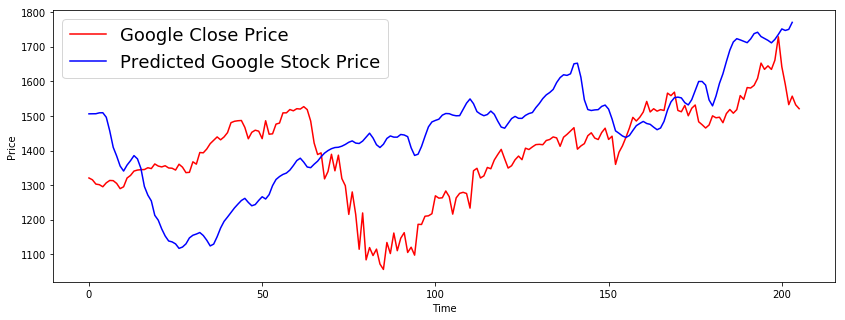

In [303]:
plt.figure(figsize = (14, 5)) # Initialize plot
plt.plot(df_test['Close'].loc[:205], color='r', label='Google Close Price') # Plot close prices excluding the last 30 values which will be used for prediction
plt.plot(y_fin, color='b', label='Predicted Google Stock Price') #Plot predicted prices 

plt.xlabel('Time') #X-axis label
plt.ylabel('Price') #Y-axis label
plt.legend(fontsize=18)

In [304]:
train_pred.shape, y_train.shape # shape of train and pred

((3838, 1), (3838,))

In [305]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_pred, y_train))

597.7414907747781

In [306]:
math.sqrt(mean_squared_error(y_fin, df_test['Close'].loc[:203]))# check mean squared error

177.14338313324922

In [242]:
close_test

array([[1.00472791],
       [0.99961108],
       [1.02519531],
       [1.02453188],
       [1.0329049 ],
       [1.0447324 ],
       [1.05228188],
       [1.05952631],
       [1.05315886],
       [1.05950341],
       [1.06903556],
       [1.0909138 ],
       [1.09397172],
       [1.09515365],
       [1.09568751],
       [1.08048177],
       [1.05546184],
       [1.06969146],
       [1.07432023],
       [1.07219262],
       [1.05571345],
       [1.09514602],
       [1.06550485],
       [1.06638946],
       [1.08774147],
       [1.09002919],
       [1.11248699],
       [1.11257086],
       [1.11980003],
       [1.11704715],
       [1.12168356],
       [1.12086764],
       [1.12622082],
       [1.11970852],
       [1.09451311],
       [1.04607453],
       [1.02080289],
       [1.02440993],
       [0.96714834],
       [0.98334536],
       [1.02130621],
       [0.98491631],
       [1.01933118],
       [0.96787284],
       [0.95214098],
       [0.88896192],
       [0.93839942],
       [0.888

In [243]:
prediction_input = close_test[205:].reshape(1,-1) # take the last 30 values from close series and reshape it to feed to the model
prediction_input.shape

(1, 30)

In [244]:
temp_list = list(prediction_input)
temp_list = temp_list[0].tolist()

In [245]:
from numpy import array

lst_output=[] #Initialze empty list, this list will contain the future predicted prices
n_steps=30 #Number of taken in account
i=0


while(i<30): #Number of days we have to predict for 
    
    if(len(temp_list)>30):
        prediction_input=np.array(temp_list[1:]) # Take all values from temp list excluding the first one
        print("{} day input {}".format(i,prediction_input))
        prediction_input=prediction_input.reshape(1,-1) # Reshape predicted_input which will always have 30 values so that it can be fed to the model
        prediction_input = prediction_input.reshape((1, n_steps, 1)) # Reshape input with respect to n-steps 
        yhat = model.predict(prediction_input, verbose=0) # Predict values based on prediction_input
        print("{} day output {}".format(i,yhat))
        temp_list.extend(yhat[0].tolist()) # Add predicted value to temp_list
        temp_list=temp_list[1:] #Update temp_list by remocing the first value
        lst_output.extend(yhat.tolist()) #Append predicted value yhat to lst_output
        i+=1
        pass
        
        
    else: #Enters Else only for day 0
        prediction_input = prediction_input.reshape((1, n_steps,1)) # Reshape input with respect to n-steps 
        yhat = model.predict(prediction_input, verbose=0) # Predict values based on prediction_input
        temp_list.extend(yhat[0].tolist()) # Add predicted value to temp_list
        lst_output.extend(yhat.tolist()) #Append predicted value yhat to lst_output
        i+=1
       
    

print(lst_output)

hey 
30
1 day input [1.17484241 1.18537357 1.11854176 1.15714315 1.19814665 1.20197478
 1.22041372 1.29584736 1.30670638 1.30547101 1.30642423 1.28918249
 1.29857733 1.29638876 1.3171155  1.3204403  1.31187664 1.29405533
 1.30712583 1.29055506 1.28496544 1.31090815 1.31285275 1.32944623
 1.30470081 1.33319048 1.35595324 1.35505345 1.35598377 1.3287344 ]
1 day output [[1.3148209]]
2 day input [1.18537357 1.11854176 1.15714315 1.19814665 1.20197478 1.22041372
 1.29584736 1.30670638 1.30547101 1.30642423 1.28918249 1.29857733
 1.29638876 1.3171155  1.3204403  1.31187664 1.29405533 1.30712583
 1.29055506 1.28496544 1.31090815 1.31285275 1.32944623 1.30470081
 1.33319048 1.35595324 1.35505345 1.35598377 1.3287344  1.31482089]
2 day output [[1.2945596]]
3 day input [1.11854176 1.15714315 1.19814665 1.20197478 1.22041372 1.29584736
 1.30670638 1.30547101 1.30642423 1.28918249 1.29857733 1.29638876
 1.3171155  1.3204403  1.31187664 1.29405533 1.30712583 1.29055506
 1.28496544 1.31090815 1.3128

26 day output [[1.1556484]]
27 day input [1.35595324 1.35505345 1.35598377 1.3287344  1.31482089 1.2945596
 1.27435637 1.25573647 1.23888838 1.22407305 1.21164072 1.20175207
 1.19437766 1.18931878 1.18629634 1.18489289 1.18435037 1.18385565
 1.18300951 1.18163157 1.17974699 1.17744696 1.17481518 1.17196035
 1.16903973 1.1661365  1.16328382 1.16059136 1.15805554 1.15564835]
27 day output [[1.1533824]]
28 day input [1.35505345 1.35598377 1.3287344  1.31482089 1.2945596  1.27435637
 1.25573647 1.23888838 1.22407305 1.21164072 1.20175207 1.19437766
 1.18931878 1.18629634 1.18489289 1.18435037 1.18385565 1.18300951
 1.18163157 1.17974699 1.17744696 1.17481518 1.17196035 1.16903973
 1.1661365  1.16328382 1.16059136 1.15805554 1.15564835 1.15338242]
28 day output [[1.1512327]]
29 day input [1.35598377 1.3287344  1.31482089 1.2945596  1.27435637 1.25573647
 1.23888838 1.22407305 1.21164072 1.20175207 1.19437766 1.18931878
 1.18629634 1.18489289 1.18435037 1.18385565 1.18300951 1.18163157
 1.17

In [246]:
scaler_two.inverse_transform(lst_output) #transform the lst_output from 0/1 to price range


array([[1792.2564805 ],
       [1774.01097153],
       [1747.44129593],
       [1720.94775077],
       [1696.53051841],
       [1674.4367492 ],
       [1655.00863923],
       [1638.70547227],
       [1625.73797486],
       [1616.06753464],
       [1609.43355731],
       [1605.47008531],
       [1603.62966739],
       [1602.91823089],
       [1602.26948084],
       [1601.15988376],
       [1599.35291946],
       [1596.88157258],
       [1593.86543198],
       [1590.41423803],
       [1586.67055942],
       [1582.84058924],
       [1579.03344256],
       [1575.2925778 ],
       [1571.76181427],
       [1568.4364622 ],
       [1565.27978514],
       [1562.30835358],
       [1559.4893392 ],
       [1556.79147694]])

In [256]:
day_new = np.arange(1, 237) #arrange placeholders for original close prices
day_pred = np.arange(237, 267) #arrange placeholders for future 30-day prices

265


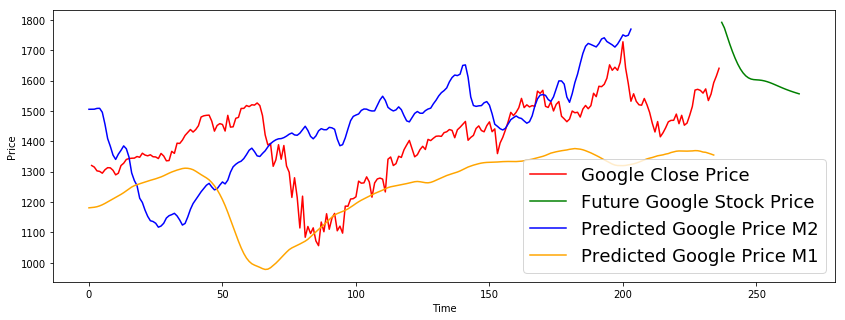

In [310]:
print(len(df_test['Close']))
plt.figure(figsize = (14, 5))
plt.plot(day_new, df_test['Close'].loc[:235], color='r', label='Google Close Price') #Plot close prices
plt.plot(day_pred, scaler_two.inverse_transform(lst_output) , color='g', label='Future Google Stock Price') #plot predicted future prices
plt.plot(y_fin, color='b', label='Predicted Google Price M2') # Plot form model 1
plt.plot(y_pred, color='orange', label='Predicted Google Price M1') # Plot from model 2



plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(fontsize=18)

In [276]:
np.mean(df_test['Close']), np.mean(y_pred), np.mean(y_fin) #summary of predicted values 

(1445.3515634226414, 1255.4004, 1448.1528)

# Conclusion


In the above graph, you can see four lines. The red line is the original close price of the test dataset, the orange line is the output values from LSTM model I, the blue line is the predicted output from LSTM model II, the small green line is the output from following the algorithm for predicting the future prices and represents the 30-day prices in the future.

This graph is very interesting, as it is evident that outputs from both the models show a rising trend over a course of 235 days which falls in tandem with the original close price. It would have been a good decision to enter the market from day 0 to day 75, in fact, LSTM model I does a better job in predicting and generalizing the long term trend, and LSTM model II does a better job in predicting prices. This could be the result of including the dropout layer in the first model and omitting them from the second model. 

The predicted prices of the first few days are 1792.25, 1774.01, 1747.44, 1720.94, 1696.53, 1674.43 in the future the current price of google as of writing this report is 1781.7 which is a very nice prediction considering the simplicity of the models in predicting stock.